<a href="https://colab.research.google.com/github/SauleAbenova/examen/blob/main/Home%20work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests beautifulsoup4 pandas nltk wordcloud
!apt-get -qq install fonts-nanum


Selecting previously unselected package fonts-nanum.
(Reading database ... 126333 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:
products = [
    "소보로빵",
    "모닝롤",
    "밤식빵",
    "크림치즈 베이글",
    "마늘바게트",
    "치아바타",
    "쌀식빵",
    "우유식빵",
    "통밀호밀빵",
    "햄치즈롤"
]

df_products = pd.DataFrame(products, columns=["상품명"])
df_products.to_csv("products.csv", index=False)
df_products


,상품명
0,소보로빵
1,모닝롤
2,밤식빵
3,크림치즈 베이글
4,마늘바게트
5,치아바타
6,쌀식빵
7,우유식빵
8,통밀호밀빵
9,햄치즈롤


In [4]:
sample_reviews = [
    "정말 맛있어요. 부드럽고 달콤해요!",
    "별로였어요. 너무 딱딱하고 맛이 없었어요.",
    "신선하고 포장도 깔끔했어요.",
    "다음엔 다시 안 살 것 같아요.",
    "아이랑 같이 먹기 좋아요.",
    "유통기한이 너무 짧았어요.",
    "빵이 촉촉하고 향도 좋았어요!",
    "크림이 너무 달아서 먹기 힘들었어요.",
    "매장에서 갓 나온 듯한 신선함!",
    "배송이 느렸지만 맛은 괜찮았어요."
]

df_reviews = pd.DataFrame(sample_reviews, columns=["리뷰"])


In [5]:
labels = ["긍정", "부정", "긍정", "부정", "긍정", "부정", "긍정", "부정", "긍정", "긍정"]
df_reviews["감정"] = labels
df_reviews["감정"].value_counts()


,count
감정,
긍정,6
부정,4


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


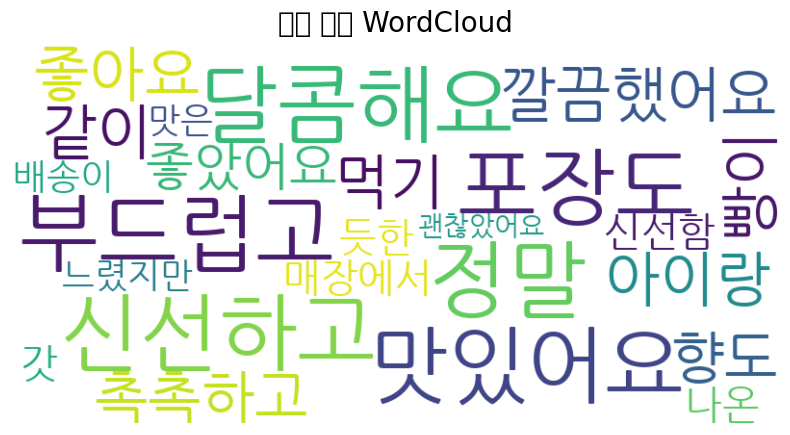

In [6]:
positive_text = " ".join(df_reviews[df_reviews["감정"] == "긍정"]["리뷰"])

if positive_text.strip():
    wc_pos = WordCloud(font_path=font_path, background_color="white", width=800, height=400).generate(positive_text)
    plt.figure(figsize=(10,5))
    plt.title("긍정 리뷰 WordCloud", fontsize=20)
    plt.imshow(wc_pos, interpolation='bilinear')
    plt.axis("off")
    plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


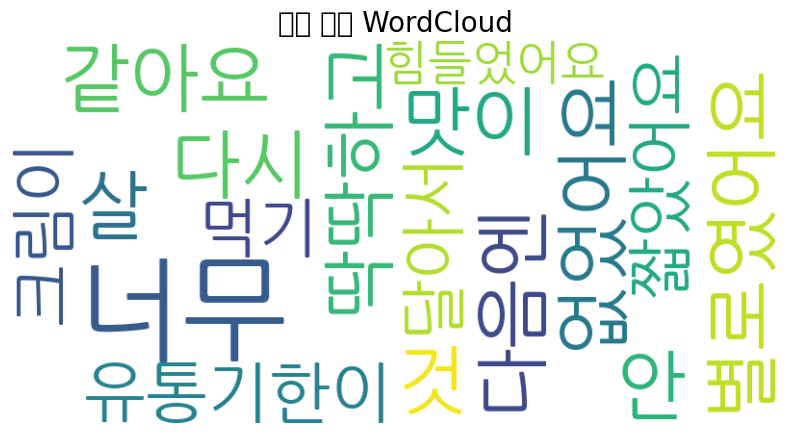

In [7]:
negative_text = " ".join(df_reviews[df_reviews["감정"] == "부정"]["리뷰"])

if negative_text.strip():
    wc_neg = WordCloud(font_path=font_path, background_color="white", width=800, height=400).generate(negative_text)
    plt.figure(figsize=(10,5))
    plt.title("부정 리뷰 WordCloud", fontsize=20)
    plt.imshow(wc_neg, interpolation='bilinear')
    plt.axis("off")
    plt.show()


In [8]:
df_reviews.to_csv("sentiment_analysis_reviews.csv", index=False)
print("📁 저장 완료: sentiment_analysis_reviews.csv")


📁 저장 완료: sentiment_analysis_reviews.csv
